In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.integrate import odeint

### Will be using the SIR model to describe tthe evoltion of COVID-19.

More specifically; we will firt use the model to reproduce observed data from Wuhan, China from late January 2020 to early Febuary 2020. To do so, we will be using a population of N=11 000 00, a mean recorvery/death rate ${\gamma}$= 1/10, n inf = 4 (n inf = the nu,ber of S each I infects, according to SIR model). As for initial values, we will be using ${I_{0}}$=574, ${R_{0}}$=0, and ${S_{0}}$ = N = ${I_{0}}$.<br><br>

<h4>Wuhan Data:</h4><br><br>
<img src='Cvirus.png'>

<ipython-input-4-91ad5c7f3bf3>:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)
<ipython-input-4-91ad5c7f3bf3>:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels)


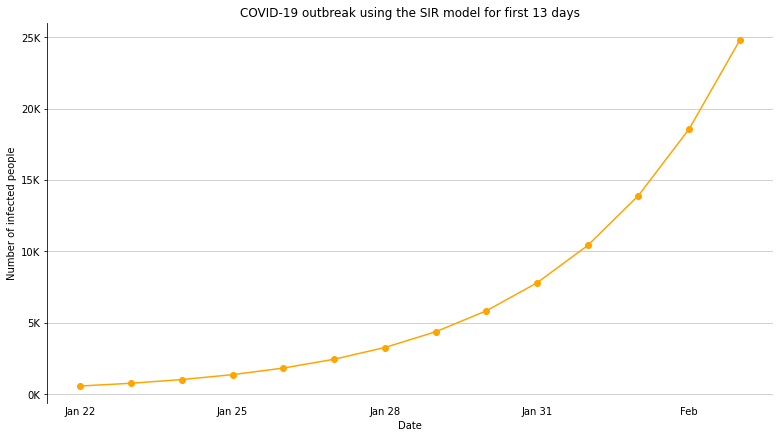

In [4]:
# Define model Parameters used

N = 11000000.0      # Total population
gamma = 1 / 10      # mean recovery/death rate
Pinf = 1 / gamma    # mean infection period
ninf = 3.9           # num each of S each I infects => start with 2 and update value to match Wuhan data
beta = ninf * gamma # infection rate

# Define initial values
I0, R0 = 574, 0     
S0 = N - I0     
y0 = S0, I0, R0

# Define SIR model
def dfdt(y, t, N, gamma, beta):
   
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt =  beta * S * I / N - gamma * I
    dRdt = gamma * I
    
    return dSdt, dIdt, dRdt

# Wuhan data spans 13 days
time = np.linspace(0,13,14)

# Solve system of ODE (a.k.a solve model)
sol = odeint(dfdt, y0, time, args=(N, gamma, beta))
S, I, R = sol.T


import matplotlib.ticker as plticker
# plot result to match Wuhan data. 
plt.close(1)
fig=plt.figure(1,figsize=(13,7)); ax = fig.subplots()
ax.plot(time, I, 'o-',color='orange')
ylabels = ['{:.0f}'.format(y)+'K' for y in ax.get_yticks()/1000]
xlabels = ['Null','Jan 22', 'Jan 25', 'Jan 28', 'Jan 31', 'Feb']
ax.set_yticklabels(ylabels)
loc = plticker.MultipleLocator(base=3.0) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
ax.set_xticklabels(xlabels)
ax.grid(True,alpha=0.7,axis='y')
ax.set_xlabel('Date')
ax.set_ylabel('Number of infected people')
ax.set_title('COVID-19 outbreak using the SIR model for first 13 days')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(axis='x',  length=0)
plt.savefig('SIR_model_plot.png',dpi=fig.dpi)
plt.show()

Comparing the Wuhan data with the plot of the SIR model, we can conclude that the SIR model replicates the data modestly well, so we can use the model to simulate the spread of the virus for a 100 day period.

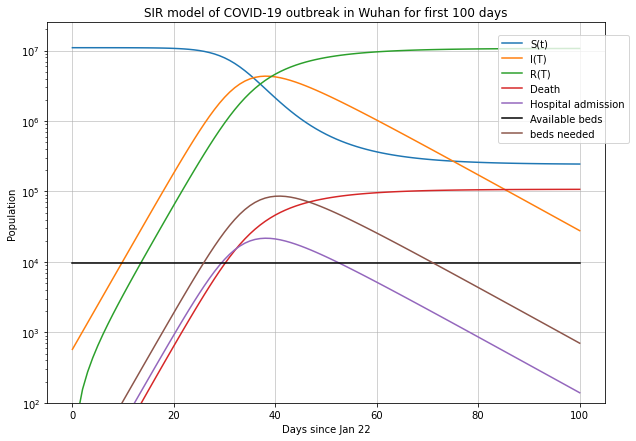

In [5]:
# Set up problem to model over 100 day period
time100 = np.linspace(0,100,101)
sol100  = odeint(dfdt, y0, time100, args=(N, gamma, beta)) 
S100, I100, R100 = sol100.T

# Number of Hospital admission = 5% of dR/dt
DR = gamma*I100
hospital_admission = 0.05*DR

# Death = 1% of R
death = 0.01*R100

covid_beds = N * 4.34/1000 * 0.2
beds_needed = [hospital_admission[i] for i in range(4)]

for i in range(4, len(time100)):
    need = [hospital_admission[j] for j in range(i-4, i)]
    beds_needed.append(sum(need))

plt.close(2)
fig = plt.figure(2,figsize=(10,7)); ax = fig.subplots()
ax.set_yscale('log')
ax.plot(time100, S100, label ='S(t)')
ax.plot(time100, I100, label = 'I(T)')
ax.plot(time100, R100, label = 'R(T)')
ax.plot(time100, death, label='Death')
ax.plot(time100, hospital_admission,label='Hospital admission')
ax.plot(time100, [covid_beds]*len(time100),color='black',label='Available beds')
ax.plot(time100, beds_needed, label='beds needed')

# yticks = ['{:.0f}'.format(y/1000000) for y in ax.get_yticks()]
# ax.set_yticklabels(yticks)

ax.legend(bbox_to_anchor=(0.8,0.67))
ax.grid(True,alpha=0.7)
ax.set_ylim(100,None)
ax.set_xlabel("Days since Jan 22")
ax.set_ylabel("Population")
ax.set_title("SIR model of COVID-19 outbreak in Wuhan for first 100 days")
plt.savefig('./images/SIR_100days.png')
plt.show()